In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.ticker import AutoMinorLocator

In [60]:
def cuadratica(x):
    return x**2

In [61]:
xv= np.linspace(-6,6,50)


In [62]:
def derivada(f,x,h=0.001):
    return (f(x+h)- f(x))/h

In [63]:
x= random.uniform(-6,6)
epocas=400
learning_rate= 0.01
for epoca in range(epocas):
    #calcular gradiente en el punto actual
    gradiente= derivada(cuadratica,x,0.0001)
    
    #dar un paso pequeño en la direccion contraria al gradiente
    x= x - gradiente*learning_rate
    #print(epoca,x)


In [64]:
theta= [random.uniform(-1,1), random.uniform(-1,1)]
print(theta)


[0.27311837442299747, 0.27457202988743656]


In [65]:
x=range(-25,25)
y=[20*xv+5 for xv in x]

In [66]:
def mse(x, y,theta):
    m,b =theta
    residuos = [(y_i-(m*x_i+b))**(2) for x_i, y_i in zip(x,y)]
    mse= sum(residuos)/ len(residuos)
    return mse

In [67]:
def limite_de_cuociente(x,y,f,v,i,h=0.0001):
    #agregar el diferencial h solo al i esimo elemento de v
    w= [v_j + (h if j==i else 0) for j,v_j in enumerate(v)]
    return (f(x,y,w)- f(x,y,v))/h


In [68]:
def estimate_gradient(x,y,f,v,h=0.0001):
    return [limite_de_cuociente(x,y,f,v,i,h) for i in range(len(v))]

In [69]:
def paso_en_gradiente(v, gradient, step_size):
    step= [step_size*g_i for g_i in gradient]
    return [a+b for a,b in zip(v,step)]

In [70]:
epocas= 60000
for epoca in range(epocas):
    grad= estimate_gradient(x,y,mse, theta,h=0.001)
    theta= paso_en_gradiente(theta,grad, -0.0001)
    #print(epoca,theta)

In [71]:
def gradiente_mse(x, y, theta):
    pendiente, intercepto = theta
    y_pred = [pendiente * xv + intercepto for xv in x]

    # Derivada parcial respecto a la pendiente
    g1 = 2 / len(x) * sum([ (y_p - y_d) * x_d for x_d, y_d, y_p in zip(x, y, y_pred) ])

    # Derivada parcial respecto al intercepto
    g2 = 2 / len(x) * sum([ (y_p - y_d) for x_d, y_d, y_p in zip(x, y, y_pred) ])
    return [g1, g2]

In [72]:
x= range(-50,50)
y= [20*xv +5 for xv in x]

In [73]:
theta= [random.uniform(-1,1),random.uniform(-1,1)]
learning_rate= 0.001
epocas=5000
for epoca in range(epocas):
    #calcular el gradiente
    grad= gradiente_mse(x,y,theta)
    #dar un paso en la direccion contraria al gradiente
    theta= paso_en_gradiente(theta, grad, -learning_rate)
    #print(epoca,theta)

In [74]:
# Generamos datos con tendencia lineal
x = 2 * np.random.rand(100)
# pendiente = 3
# intercepto = 4
y = 4 + 3 * x + np.random.rand(100)

## batch gradient descent

In [75]:
# comenzar con valores aleatorios para la pendiente
# y el intercepto
theta = [random.uniform(-1,1), random.uniform(-1,1)]
learning_rate = 0.001
n_iter_max = 100_000
gtol = 1e-6 # tolerancia en la norma del vector gradiente
# Gradient descent
iterar = True
n_iter = 0
while iterar:
    # Calcular el gradiente
    grad = gradiente_mse(x, y, theta)
    # Realizar un paso en la dirección contraria
    # al gradiente
    theta = paso_en_gradiente(theta, grad, -learning_rate)
    # Check 1: ver si se alcanzó el número máximo de iteraciones
    if n_iter > n_iter_max:
        iterar = False
    # Check 2: revisar si la norma del gradiente ya alcanzó el
    # mínimo tamaño permitido por el criterio de tolerancia
    norm_grad = sum([g**2 for g in grad])**(1/2)
    if norm_grad < gtol:
        iterar = False
    # Contabilizar la iteracion
    n_iter += 1
print("Solucion: ", theta)
print("Num iteraciones: ", n_iter)

Solucion:  [2.962199147045892, 4.519726816506575]
Num iteraciones:  50335


In [76]:
# Calcular el coeficiente de determinación R-squared
# Suma total de cuadrados: variacion total de y_i's respecto a su promedio
y_prom = np.mean(y)
suma_total_cuadrados = sum([v**2 for v in y - y_prom])
# Suma de errores cuadráticos
suma_sqerrors = sum([ (theta[0] * xv + theta[1] - yv)**2 for xv,yv in zip(x,y) ])
# calculo de r-squared
r_squared = 1 - suma_sqerrors / suma_total_cuadrados
print("R-squared: ", r_squared)


R-squared:  0.9655481238532825


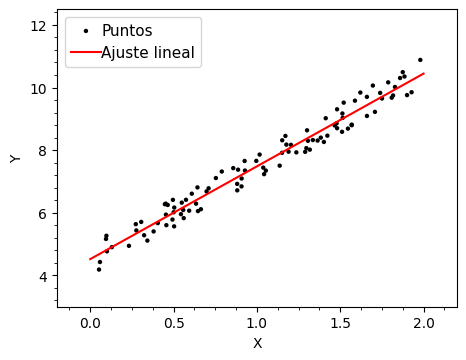

In [77]:
fig=plt.figure(1,figsize=(5,3.5),dpi=100)
fig.subplots_adjust(left=0.15,bottom=0.12,right=0.95,top=0.97,hspace=0.24,wspace=0.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_xlim(-0.2,2.2)
ax1.set_ylim(3.0,12.5)
ax1.scatter(x,y,marker=".",fc="black",ec="none",s=40,label="Puntos")
xv=np.linspace(0,2,100)
ax1.plot(xv,xv*theta[0]+theta[1],color="red",label="Ajuste lineal")
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc=2,scatterpoints=1,handletextpad=0.001,fontsize=11)
plt.show()

## descenso de gradiente estocástico

In [78]:
# Generamos datos con tendencia lineal
x = 2 * np.random.rand(100)
# pendiente = 3
# intercepto = 4
y = 4 + 3 * x + np.random.rand(100)

In [79]:
n_epocas = 50
t0, t1 = 5, 50 # hiperparámetros de la learning schedule
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.rand(2) # parámetros iniciales aleatorios
# El número de puntos
m = len(x)
thetas = []
for epoca in range(n_epocas):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grad = gradiente_mse(x, y, theta)
        
        learning_rate = learning_schedule(epoca * m + i)
        theta = paso_en_gradiente(theta, grad, -learning_rate)
        thetas.append(theta)
print(theta)

[2.9168880749546124, 4.6264249449802195]


## descenso de gradiente mini-batch

In [80]:
n_epocas = 1000
batch_size = 10
t0, t1 = 5, 50 # hiperparámetros de la learning schedule
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.rand(2) # parametros iniciales aleatorios
# Numero de puntos
m = len(x)
thetas = []
for epoca in range(n_epocas):
    i_mb = np.random.randint(0, m, batch_size)
    xi = x[i_mb]
    yi = y[i_mb]
    grad = gradiente_mse(xi, yi, theta)
    learning_rate = learning_schedule(epoca)
    theta = paso_en_gradiente(theta, grad, -learning_rate)
    thetas.append(theta)
print(theta)

[2.924795913654107, 4.625711245777191]


## clase 3

In [81]:
def gradiente_mse_pol(x, y, theta):
    """
    x --> lista de tuplas de features [(x1, x2, x3 ...)_1, (x1, x2, x3 ...)_1 ...]
    y --> lista de valores de variable independiente [y1, y2, y3, ...]
    """
    y_pred = []
    for xa in x:
        yp = sum([t*xv for xv, t in zip(xa, theta)])
        y_pred.append(yp)
    # Las derivadas parciales serán calculadas para cada feature
    derivadas = []
    for i in range(len(x[0])):
        g = 2 / len(x[:,i]) * sum([ (y_p - y_d) * x_d for x_d, y_d, y_p in zip(x[:,i], y, y_pred) ])
        derivadas.append(g)
    return derivadas

In [82]:
#profe
def gradiente_mse_pol_clas(x, y ,theta):
    #theta es un lista con los valores de los parametros
    #y es una lista de numeros(arreglo de 1 dimesion)
    #x coleccion de tuplas en una lista, que siempre lleva un 1 (1,x1i,x2i) tupla de tres valores
    
    #primero calcular las predicciones  del modelo con parametros de input
    y_pred= []
    for xa in x:
        yp=sum([t*xv for xv,t in zip(xa,theta)])
        y_pred.append(yp)
        
    #calcular derivadas parciales para cada atributo
    derivadasP=[]
    for i in range(len(x[0])):
        g= 2 / len(y) * sum( [(y_p-y_d)* x_d for x_d, y_d, y_p in zip(x[:,i], y, y_pred)] )
        derivadasP.append(g)
    return derivadasP
        

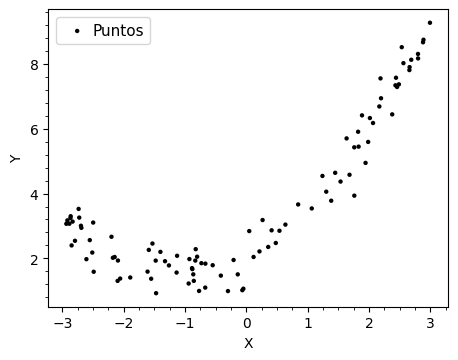

In [83]:
m = 100
x = 6 * np.random.rand(m) - 3
y = 2 + x + 0.5 * x**2 + 0.5*np.random.randn(m)
#grafico
fig=plt.figure(1,figsize=(5,3.5),dpi=100)
fig.subplots_adjust(left=0.15,bottom=0.12,right=0.95,top=0.97,hspace=0.24,wspace=0.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax1.scatter(x,y,marker=".",fc="black",ec="none",s=40,label="Puntos")
xv=np.linspace(0,2,100)
#ax1.plot(xv,xv*theta[0]+theta[1],color="red",label="Ajuste lineal")
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc=2,scatterpoints=1,handletextpad=0.001,fontsize=11)
plt.show()

In [84]:
# calculamos  el gradient descent
theta=[random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

X= np.array([(1,xv,xv**2) for xv in x])
learning_rate= 0.001
n_iter_max= 100_000
gtol= 1e-6

#batch gradiente descent
iterar= True
n_iter= 0
while iterar:
    gradiente= gradiente_mse_pol_clas(X,y,theta)
    
    #damos un paso en la direccion contrario al gradiente
    theta= paso_en_gradiente(theta,gradiente,-learning_rate)
    
    #revisar si se alcanzo el numero maximo de iteraciones
    if n_iter > n_iter_max:
        iterar=False
        
    #revisamos si la norma del gradiente alcanzo el umbral minimo
    norm_grad= sum([g**2 for g in gradiente])**(1/2)
    if norm_grad < gtol:
        iterar = False
    n_iter +=1
print(theta)
print(n_iter)

[2.087584832178227, 0.9994208429774775, 0.4644984624242041]
19063


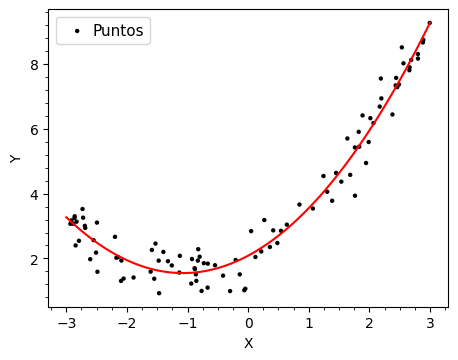

In [85]:
#grafico
fig=plt.figure(1,figsize=(5,3.5),dpi=100)
fig.subplots_adjust(left=0.15,bottom=0.12,right=0.95,top=0.97,hspace=0.24,wspace=0.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax1.scatter(x,y,marker=".",fc="black",ec="none",s=40,label="Puntos")
xv=np.linspace(-3,3,100)
yv= theta[0]+ theta[1] * xv + theta[2]* xv**2


ax1.plot(xv,yv,color="red")
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc=2,scatterpoints=1,handletextpad=0.001,fontsize=11)
plt.show()

In [86]:
# Calcular el coeficiente de determinación R-squared

# suma total de cuadrados: variacion total de los y_i respecto a su promedio
y_prom = np.mean(y)
suma_total_cuadrados= sum([v**2 for v in y-y_prom])

#suma de los errores cuadraticos
sum_sqerrors= sum([(theta[0]*xv[0] + theta[1]*xv[1] + theta[2]*xv[2] -yv)**2 for xv, yv, in zip(X,y)])

#calculo de R-squared
r_squared= 1-sum_sqerrors/ suma_total_cuadrados

print("R-squared:",r_squared )


R-squared: 0.9603284114457556


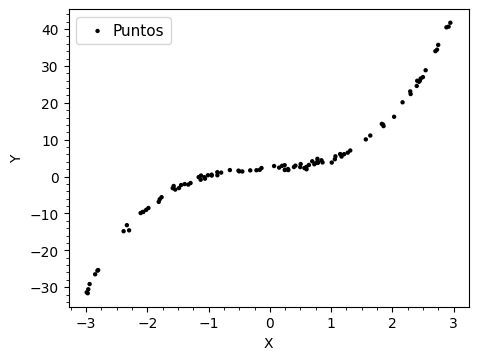

In [87]:
#ejemplo polinomio grado 3
m = 100
x = 6 * np.random.rand(m) - 3
y = 2 + x + 0.5 * x**2 + 1.3* x**3 + 0.5*np.random.randn(m)
#grafico
fig=plt.figure(1,figsize=(5,3.5),dpi=100)
fig.subplots_adjust(left=0.15,bottom=0.12,right=0.95,top=0.97,hspace=0.24,wspace=0.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax1.scatter(x,y,marker=".",fc="black",ec="none",s=40,label="Puntos")


#ax1.plot(xv,xv*theta[0]+theta[1],color="red",label="Ajuste lineal")
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc=2,scatterpoints=1,handletextpad=0.001,fontsize=11)
plt.show()

In [88]:
# calculamos  el gradient descent
theta=[random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

X= np.array([(1,xv,xv**2,xv**3) for xv in x])
learning_rate= 0.001
n_iter_max= 100_000
gtol= 1e-6

#batch gradiente descent
iterar= True
n_iter= 0
while iterar:
    gradiente= gradiente_mse_pol_clas(X,y,theta)
    
    #damos un paso en la direccion contrario al gradiente
    theta= paso_en_gradiente(theta,gradiente,-learning_rate)
    
    #revisar si se alcanzo el numero maximo de iteraciones
    if n_iter > n_iter_max:
        iterar=False
        
    #revisamos si la norma del gradiente alcanzo el umbral minimo
    norm_grad= sum([g**2 for g in gradiente])**(1/2)
    if norm_grad < gtol:
        iterar = False
    n_iter +=1
print(theta)
print(n_iter)

[2.0203674243483474, 1.0654420380680156, 0.47511786378827686, 1.2828840144704674]
14668


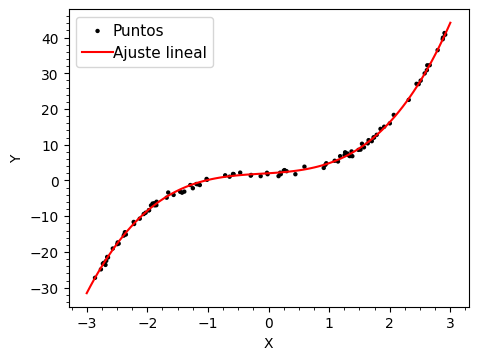

In [89]:
m = 100
x = 6 * np.random.rand(m) - 3
y = 2 + x + 0.5 * x**2 + 1.3* x**3 + 0.5*np.random.randn(m)
#grafico
fig=plt.figure(1,figsize=(5,3.5),dpi=100)
fig.subplots_adjust(left=0.15,bottom=0.12,right=0.95,top=0.97,hspace=0.24,wspace=0.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax1.scatter(x,y,marker=".",fc="black",ec="none",s=40,label="Puntos")

xv=np.linspace(-3,3,100)
yv= theta[0]+ theta[1] * xv + theta[2]* xv**2+ theta[3]*xv**3

ax1.plot(xv,yv,color="red",label="Ajuste lineal")

ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc=2,scatterpoints=1,handletextpad=0.001,fontsize=11)
plt.show()

In [90]:
#ejemplo polinomio grado 4
m= 100
x= 2.8* np.random.rand(m)-1.4
y= 2 + 5*x- 3*x**2 - 8*x**3 + 4*x**4 + 0.2*np.random.randn(m)

In [91]:
# calculamos  el gradient descent
theta=[random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

X= np.array([(1,xv,xv**2,xv**3,xv**4) for xv in x])
learning_rate= 0.001
n_iter_max= 100_000
gtol= 1e-6

#batch gradiente descent
iterar= True
n_iter= 0
while iterar:
    gradiente= gradiente_mse_pol_clas(X,y,theta)
    
    #damos un paso en la direccion contrario al gradiente
    theta= paso_en_gradiente(theta,gradiente,-learning_rate)
    
    #revisar si se alcanzo el numero maximo de iteraciones
    if n_iter > n_iter_max:
        iterar=False
        
    #revisamos si la norma del gradiente alcanzo el umbral minimo
    norm_grad= sum([g**2 for g in gradiente])**(1/2)
    if norm_grad < gtol:
        iterar = False
    n_iter +=1
print(theta)
print(n_iter)

[1.9730661342206748, 4.958316334596848, -2.8588436905023293, -7.914863027049443, 3.9183950075320686]
100002


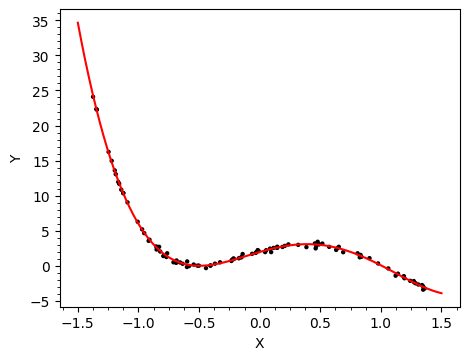

In [96]:
#grafico
fig=plt.figure(1,figsize=(5,3.5),dpi=100)
fig.subplots_adjust(left=0.15,bottom=0.12,right=0.95,top=0.97,hspace=0.24,wspace=0.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax1.scatter(x,y,marker=".",fc="black",ec="none",s=40,label="Puntos")

xv=np.linspace(-1.5,1.5,100)
yv= theta[0]+ theta[1] * xv + theta[2]* xv**2+ theta[3]*xv**3+ theta[4]*xv**4

ax1.plot(xv,yv,color="red",label="Ajuste lineal")

ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))